In [14]:
import pandas as pd
prefix = '14-9F-3C-DA-5B-26'
output_path = '/Volumes/hex/ST1505558269-res/'
p = pd.read_csv(output_path + 'ST1505558269_1.0.csv')

p.columns

Index(['time', 'window', 'accX', 'accX_std', 'accY', 'accY_std', 'accZ',
       'accZ_std', 'gyrX', 'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std',
       'heartR', 'heartR_std', 'AirTemperature', 'AT_std', 'AirPressure',
       'AP_std', 'PlethysmogramGreen', 'ple_std', 'date', 'alc', 'cig', 'mood',
       'tense', 'tired', 'period', 'rumination', 'socialize', 'socialize_val',
       'sport_time', 'work_time', 'day_sleep', 'phq_1', 'phq_2'],
      dtype='object')

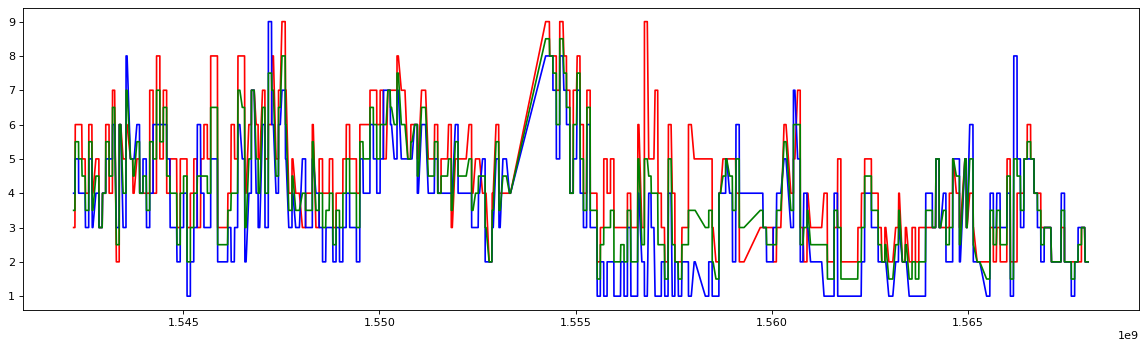

In [15]:
from matplotlib import pyplot
%matplotlib inline
xaxis = p[['time']]
yaxis = p[['phq_1']]
yaxis2 = p[['phq_2']]
avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='phq_2')
pyplot.plot(xaxis, avg, color='green', label='avg')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [17]:
def display_scores(score):
    print('scores:', score)
    print('Mean:', score.mean())
    print('std dev:', score.std())

In [18]:
# drop zeros 
p = p.drop(['work_time','date'], axis=1)

In [19]:
train_set, test_set = train_test_split(p, test_size=0.25, random_state=42, shuffle=True)

In [20]:
X_train = train_set.loc[:,'accX':'day_sleep']
y_train_1 = train_set.loc[:, ['phq_1']].values.ravel()
y_train_2 = train_set.loc[:, ['phq_2']].values.ravel()

X_test = test_set.loc[:,'accX':'day_sleep']
y_test_1 = test_set[['phq_1']].values.ravel()
y_test_2 = test_set[['phq_2']].values.ravel()

In [21]:
X_train.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,cig,mood,tense,tired,period,rumination,socialize,socialize_val,sport_time,day_sleep
105692,-10.83,3.55,-2.09,2.04,1.36,2.04,-3.50,130.34,8.36,104.35,...,2.0,9.0,6.0,5.0,0.0,3.0,45.0,93.0,0.0,0.0
72612,6.04,0.07,-3.36,0.19,7.12,0.19,-0.14,1.79,-0.56,0.53,...,1.0,7.0,7.0,1.0,0.0,3.0,33.0,82.0,110.0,0.0
101919,8.39,6.50,-5.51,2.86,0.33,2.86,0.70,24.31,-0.35,12.88,...,1.0,7.0,8.0,5.0,0.0,5.0,16.0,54.0,75.0,0.0
40159,-8.68,0.47,3.62,2.99,-0.75,2.99,0.07,29.96,-0.35,8.36,...,1.0,2.0,4.0,8.0,0.0,8.0,0.0,0.0,60.0,0.0
83755,0.17,0.03,-0.29,0.03,9.63,0.03,0.07,0.02,-0.63,0.03,...,1.0,7.0,4.0,4.0,0.0,2.0,47.0,63.0,60.0,300.0


In [22]:
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=35, n_jobs=-1 ,oob_score=True)
rnd_reg.fit(X_train, y_train_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=35,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [10]:
y_pred_1 = rnd_reg.predict(X_train)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
forest_mse = mean_squared_error(y_train_1, y_pred_1)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.7486703643018537

In [12]:
y_pred_test_1 = rnd_reg.predict(X_test)

In [13]:
forest_test_mse = mean_squared_error(y_test_1, y_pred_test_1)
forest_test_rmse = np.sqrt(forest_test_mse)
forest_test_rmse

0.7472775475147023

In [12]:
from sklearn.utils import shuffle
y_shuffled = shuffle(y_pred_1)
forest_mse_shuffled = mean_squared_error(y_train_1, y_shuffled)
forest_rmse_shuffled = np.sqrt(forest_mse_shuffled)
forest_rmse_shuffled

2.2882547993006614

In [13]:
cols = []
scores = []
for name, score in zip(X_train.columns, rnd_reg.feature_importances_):
#     print(name, score)
    cols.append(name)
    scores.append(score)
    
print(cols)
print(scores)

['accX', 'accX_std', 'accY', 'accY_std', 'accZ', 'accZ_std', 'gyrX', 'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std', 'heartR', 'heartR_std', 'AirTemperature', 'AT_std', 'AirPressure', 'AP_std', 'PlethysmogramGreen', 'ple_std', 'alc', 'cig', 'mood', 'tense', 'tired', 'period', 'rumination', 'socialize', 'socialize_val', 'sport_time', 'day_sleep']
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006285792652340958, 0.0, 0.0, 0.0, 0.0, 0.04599109364175019, 0.4360608612584, 0.01118366777371012, 0.0038929103286042947, 0.009677946604549419, 0.14193582888379416, 0.0755412196384253, 0.19008990098589845, 0.038536753395949294, 0.046461238223684455]


In [13]:

forest_scores = cross_val_score(rnd_reg, X_train, y_train_1,scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores: [0.76384426 0.75675616 0.74026719 0.75100605 0.75338702 0.74715692
 0.74894806 0.74566271 0.73937793 0.75317809]
Mean: 0.7499584388543983
std dev: 0.00703870716589639
